In [1]:
import os

os.environ["SPARK_HOME"] = "C:/spark-2.4.4-bin-hadoop2.7"
os.environ["HADOOP_HOME"] = "C:/winutils"

from pyspark import SparkContext
sc = SparkContext('local')

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [2]:
KCDPFinal = sqlContext.read.csv("C:/Users/Michael/Desktop/Project/1-Datasets/KCPD_Crime_Data/KCcrime2010To2018.csv", inferSchema = True, header = True)

In [3]:
KCDPFinal.createTempView(name = "kccrime")

In [4]:
query1 = sqlContext.sql("select description, count(*) as count from kccrime group by description")
query1.show()

+--------------------+-----+
|         description|count|
+--------------------+-----+
|      misc violation|   13|
|               FRAUD|    2|
|  stealing from auto|    2|
|     PROPERTY DAMAGE|    2|
|liquor law violation|    2|
|  stealing from bldg|    5|
|Prostitution/Solicit|  788|
|Possession/Sale/Dist|39608|
|Stealing from Buildi|47710|
|            misc off|    4|
|Accidental Drug Over|    5|
|Aggravated Assault (|49141|
|  misc investigation|    5|
|            Stalking|  148|
|Stealing Auto Parts/|51550|
|         Drunkenness|  831|
|  Family Disturbance|   80|
|      Statutory Rape|  717|
| Liquor Law Violaton| 2381|
|                   ]|    2|
+--------------------+-----+
only showing top 20 rows



In [5]:
#Save the output in csv file
query1.toPandas().to_csv('query-1.csv')

In [6]:
import re
crime_list = []

for k in query1.select("description").collect():
    ctxt = (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(k.description)).split())).lstrip("RT")
    if (ctxt != ""):
        crime_list.append(ctxt)
print(len(crime_list))

244


In [7]:
from PIL import Image
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
q1_data = pd.read_csv('query-1.csv')

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size= 500, stopwords = stopwords, max_words=5000,contour_width=3, background_color="white").generate(str(crime_list))
plt.figure(figsize=[20,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<Figure size 2000x1500 with 1 Axes>

In [8]:
query2o = sqlContext.sql("select Reported_year, Sex, count(*) as count from kccrime where Sex RLIKE 'M|F|U' and Reported_year = '2018' group by Reported_year, Sex")
query2o.show()
query2t = sqlContext.sql("select Reported_year, Sex, count(*) as count from kccrime where Sex RLIKE 'M|F|U' and Reported_year = '2016' group by Reported_year, Sex")
query2t.show()

+-------------+---+-----+
|Reported_year|Sex|count|
+-------------+---+-----+
|         2018|  F|34487|
|         2018|  U|41046|
|         2018|  M|49932|
+-------------+---+-----+

+-------------+---+-----+
|Reported_year|Sex|count|
+-------------+---+-----+
|         2016|  U|41442|
|         2016|  M|50441|
|         2016|  F|34584|
+-------------+---+-----+



In [9]:
#Save the output in csv file
query2o.toPandas().to_csv('query-2o.csv')
query2t.toPandas().to_csv('query-2t.csv')

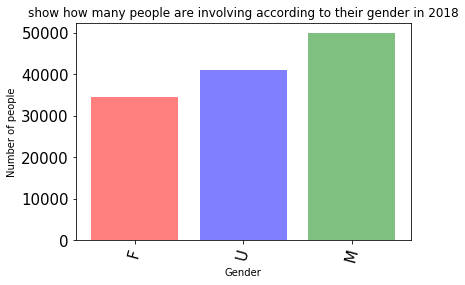

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#Query 1 visualization code
q1_data = pd.read_csv('query-2o.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('red', 'blue', 'green'))
plt.ylabel('Number of people')
plt.xlabel('Gender')
plt.title('show how many people are involving according to their gender in 2018')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

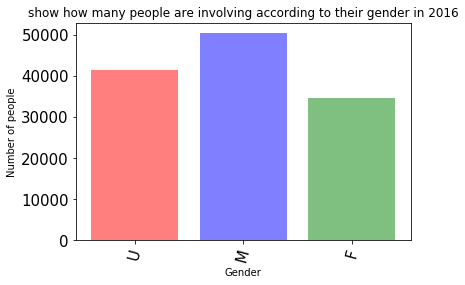

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#Query 1 visualization code
q1_data = pd.read_csv('query-2t.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('red', 'blue', 'green'))
plt.ylabel('Number of people')
plt.xlabel('Gender')
plt.title('show how many people are involving according to their gender in 2016')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [12]:
query3 = sqlContext.sql("select Reported_year, Sex, Involvement, count(*) as count, Zip_Code from kccrime where Sex RLIKE 'M|F|U' and Reported_year = '2018' and Involvement = 'ARR' and Zip_Code = '64112' group by Reported_year, Sex, Involvement, Zip_Code")
query3.show()

+-------------+---+-----------+-----+--------+
|Reported_year|Sex|Involvement|count|Zip_Code|
+-------------+---+-----------+-----+--------+
|         2018|  M|        ARR|   67| 64112.0|
|         2018|  F|        ARR|   27| 64112.0|
+-------------+---+-----------+-----+--------+



In [13]:
#Save the output in csv file
query3.toPandas().to_csv('query-3.csv')

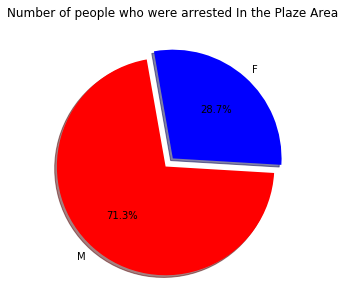

In [14]:
#Query 3 visualization code
q3_data = pd.read_csv('query-3.csv')

plt.figure(figsize=(5, 5))

account_type = q3_data["Sex"]
tweetsNumber = q3_data["count"]
colors = ['red', 'blue']
explode = (0.1, 0)  
plt.pie(tweetsNumber, labels=account_type, explode = explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)
plt.title("Number of people who were arrested In the Plaze Area")
plt.show()

In [15]:
query4 = sqlContext.sql("select Reported_year, Sex, Involvement, count(*) as count from kccrime where Sex RLIKE 'M|F|U' and Reported_year = '2016' and Involvement = 'VIC' group by Reported_year, Sex, Involvement")
query4.show()

+-------------+---+-----------+-----+
|Reported_year|Sex|Involvement|count|
+-------------+---+-----------+-----+
|         2016|  U|        VIC|18709|
|         2016|  M|        VIC|22070|
|         2016|  F|        VIC|24482|
+-------------+---+-----------+-----+



In [16]:
#Save the output in csv file
query4.toPandas().to_csv('query-4.csv')

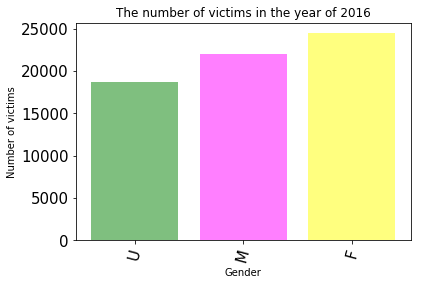

In [17]:
q1_data = pd.read_csv('query-4.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('green', 'magenta', 'yellow'))
plt.ylabel('Number of victims')
plt.xlabel('Gender')
plt.title('The number of victims in the year of 2016')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [18]:
query5 = sqlContext.sql("select Race, count(*) as count, Involvement from kccrime where Race RLIKE 'B|I|W' and Involvement = 'SUS' group by Race, Involvement")
query5.show()

+----+------+-----------+
|Race| count|Involvement|
+----+------+-----------+
|   W| 63712|        SUS|
|   B|135642|        SUS|
|   I|   154|        SUS|
+----+------+-----------+



In [19]:
#Save the output in csv file
query5.toPandas().to_csv('query-5.csv')

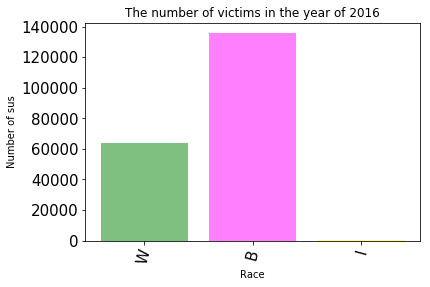

In [20]:
q1_data = pd.read_csv('query-5.csv')

plt.bar(q1_data['Race'],q1_data['count'], alpha=0.5,color=('green', 'magenta', 'yellow'))
plt.ylabel('Number of sus')
plt.xlabel('Race')
plt.title('The number of victims in the year of 2016')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [21]:
query6 = KCDPFinal.groupBy("Sex").count()
query6.show()

+---+------+
|Sex| count|
+---+------+
|  F|297290|
|  M|436922|
|  U|387362|
+---+------+



In [22]:
#Save the output in csv file
query6.toPandas().to_csv('query-6.csv')

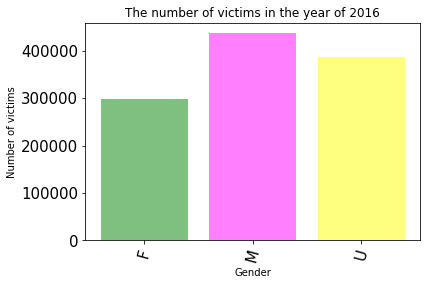

In [23]:
q1_data = pd.read_csv('query-6.csv')

plt.bar(q1_data['Sex'],q1_data['count'], alpha=0.5,color=('green', 'magenta', 'yellow'))
plt.ylabel('Number of victims')
plt.xlabel('Gender')
plt.title('The number of victims in the year of 2016')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [24]:
query7 = sqlContext.sql("select Reported_year, count(*) as count from kccrime group by Reported_year")
query7.show()

+-------------+------+
|Reported_year| count|
+-------------+------+
|         2018|125465|
|         2015|120496|
|         2013|120652|
|         2014|119567|
|         2012|125710|
|         2016|126467|
|         2010|130407|
|         2011|123523|
|         2017|129287|
+-------------+------+



In [25]:
#Save the output in csv file
query7.toPandas().to_csv('query-7.csv')

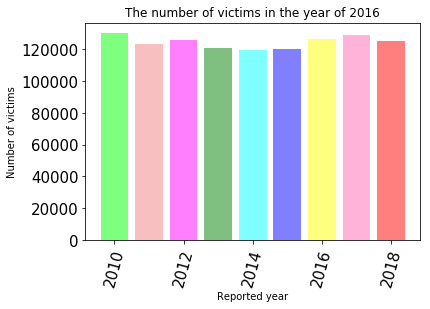

In [26]:
q1_data = pd.read_csv('query-7.csv')

plt.bar(q1_data['Reported_year'],q1_data['count'], alpha=0.5,color=('red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'lime', 'lightcoral','hotpink','skyblue'))
plt.ylabel('Number of victims')
plt.xlabel('Reported year')
plt.title('The number of victims in the year of 2016')
plt.xticks(fontsize=15, rotation =75)
plt.yticks(fontsize=15)
plt.show()

In [27]:
query8 = sqlContext.sql("select Sex, Description, count(*) as count from kccrime where Sex = 'F' group by Sex, Description")
query8.show()

+---+--------------------+-----+
|Sex|         Description|count|
+---+--------------------+-----+
|  F|  DISORDERLY CONDUCT|    1|
|  F|     non agg assault|    1|
|  F|   Withhold Property|    2|
|  F|  Passing Bad Checks|   75|
|  F|      Counterfeiting|  162|
|  F|            misc Inv|    1|
|  F|         Pornography|   66|
|  F|   offensive contact|    1|
|  F|        embezzlement|    1|
|  F|             IDTheft|    1|
|  F|Sex Off Fondle - mol| 1255|
|  F|Hacking/Computer Inv|   44|
|  F|Sex Off Indecent Con|  279|
|  F|Negligent Manslaught|    2|
|  F|       stealing-bldg|    1|
|  F|         Trespassing| 3938|
|  F|  Stealing All Other| 9515|
|  F|     Steal from Auto|    1|
|  F|        Burg Res Occ|    1|
|  F|Aggravated Assault (|13935|
+---+--------------------+-----+
only showing top 20 rows



In [28]:
#Save the output in csv file
query8.toPandas().to_csv('query-8.csv')

In [29]:
import re
crime_list = []

for k in query8.select("description").collect():
    ctxt = (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(k.description)).split())).lstrip("RT")
    if (ctxt != ""):
        crime_list.append(ctxt)
print(len(crime_list))

163


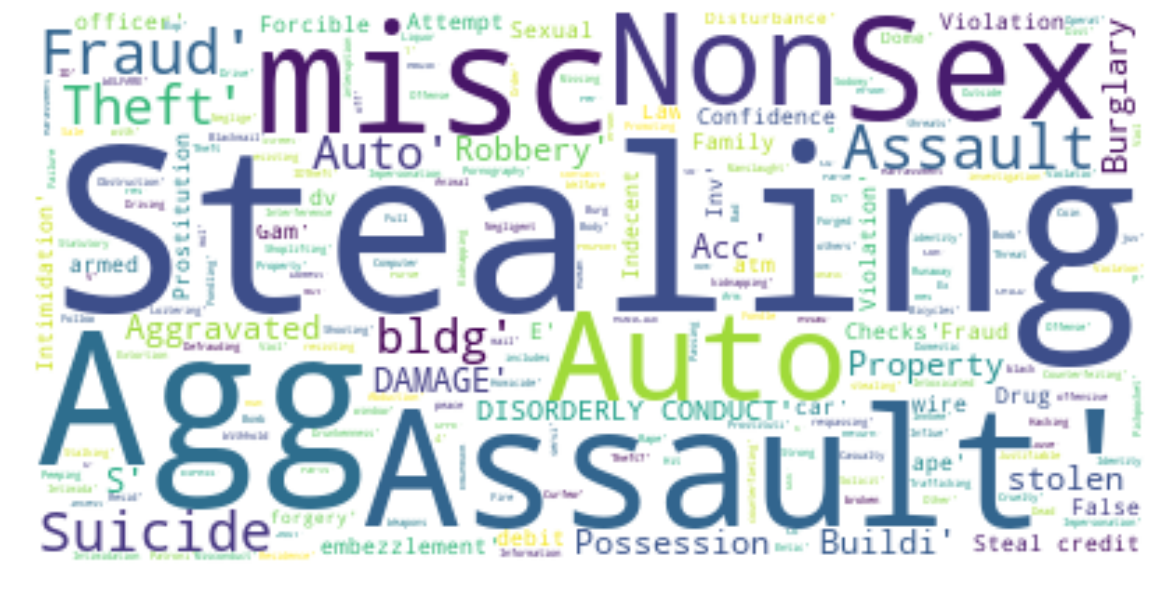

In [30]:
from PIL import Image
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
q1_data = pd.read_csv('query-1.csv')

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size= 500, stopwords = stopwords, max_words=5000,contour_width=3, background_color="white").generate(str(crime_list))
plt.figure(figsize=[20,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
query9 = sqlContext.sql("select Sex, Description, count(*) as count from kccrime where Age < '18' and Involvement = 'VIC' group by Sex, Description")
query9.show()

+---+--------------------+-----+
|Sex|         Description|count|
+---+--------------------+-----+
|  M|  Stealing All Other|  182|
|  M|Sex Off Indecent Con|   15|
|  F|  Passing Bad Checks|    1|
|  F|         Pornography|   11|
|  M|Hit and Run of a Per|    3|
|  M|Sex Off Fondle - mol|   67|
|  U|Agg Assault - Drive-|    1|
|  F|Sex Off Fondle - mol|  332|
|  F|Sex Off Indecent Con|   43|
|  F|Negligent Manslaught|    2|
|  F|         Trespassing|    9|
|  F|  Stealing All Other|  168|
|  M|Credit/Debit/ATM Car|    8|
|  M|Stealing Shoplifting|    7|
|  F|Aggravated Assault (|  854|
|  F|Possession of Drug E|    9|
|  M|               Arson|   13|
|  F| Sexual Assault with|    2|
|  M|  child endangerment|    4|
|  M|Stealing from Buildi|  180|
+---+--------------------+-----+
only showing top 20 rows



In [32]:
#Save the output in csv file
query9.toPandas().to_csv('query-9.csv')

In [33]:
import re
crime_list = []

for k in query9.select("description").collect():
    ctxt = (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(k.description)).split())).lstrip("RT")
    if (ctxt != ""):
        crime_list.append(ctxt)
print(len(crime_list))

146


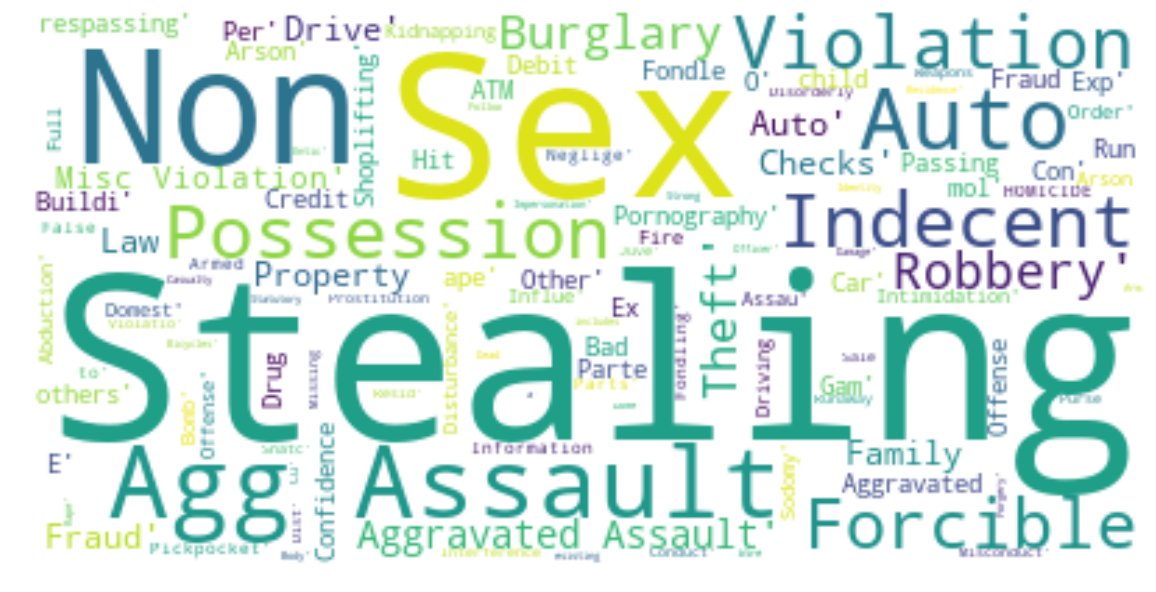

In [34]:
from PIL import Image
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
q1_data = pd.read_csv('query-1.csv')

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size= 500, stopwords = stopwords, max_words=5000,contour_width=3, background_color="white").generate(str(crime_list))
plt.figure(figsize=[20,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
query10 = sqlContext.sql("select y.yr, y.dsc, MAX(y.num) from (select Reported_year as yr, Description as dsc, count(*) as num from kccrime group by Reported_year, Description) y group by y.yr, y.dsc")
query10.show()

+----+--------------------+--------+
|  yr|                 dsc|max(num)|
+----+--------------------+--------+
|2010|  Strong Arm Robbery|    1542|
|2011|Promoting Prostituti|      31|
|2013|         Drunkenness|     156|
|2013|            misc Inv|       1|
|2016| Sexual Assault with|       6|
|2018|Auto Theft Outside S|      47|
|2010|     Forcible Sodomy|     324|
|2011|             Forgery|     645|
|2013|Sex Off Fondle - mol|     247|
|2013|Violation Ex Parte O|     245|
|2014|Possession/Sale/Dist|    4704|
|2011|Accidental Drug Over|       3|
|2012|  Stealing All Other|    5347|
|2013|Missing/Runaway Juve|       2|
|2016|      Statutory Rape|      60|
|2016|Sex Off Follow/Entic|      12|
|2011|       Impersonation|    1313|
|2016|Resisting an Officer|    1551|
|2016| Stealing Pickpocket|     109|
|2018|    Business Robbery|       3|
+----+--------------------+--------+
only showing top 20 rows



In [36]:
#Save the output in csv file
query10.toPandas().to_csv('query-10.csv')

In [37]:
import re
crime_list = []

for k in query10.select("dsc").collect():
    ctxt = (' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(k.dsc)).split())).lstrip("RT")
    if (ctxt != ""):
        crime_list.append(ctxt)
print(len(crime_list))

952


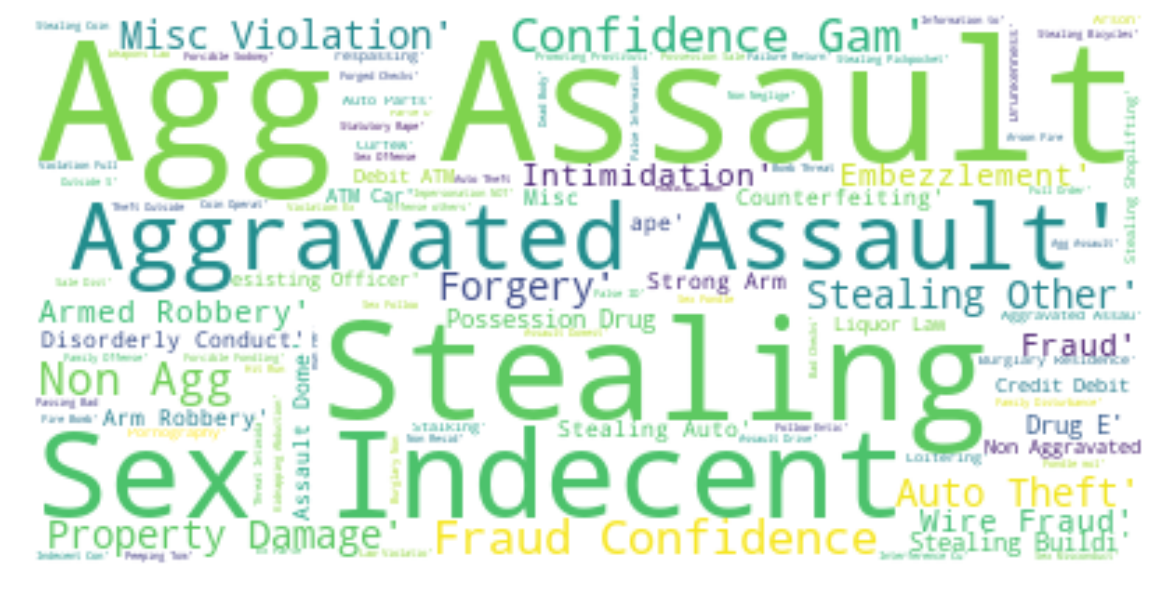

In [38]:
from PIL import Image
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
q1_data = pd.read_csv('query-1.csv')

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size= 500, stopwords = stopwords, max_words=5000,contour_width=3, background_color="white").generate(str(crime_list))
plt.figure(figsize=[20,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()